# Regularizing Linear Models

## Setup

In [1]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("ML-Regression-Notebooks"):
    raise ValueError("Please change working directory to 'path/Classifying-the-MNIST' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/ML-Regression-Notebooks


In [2]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate Data

In [4]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

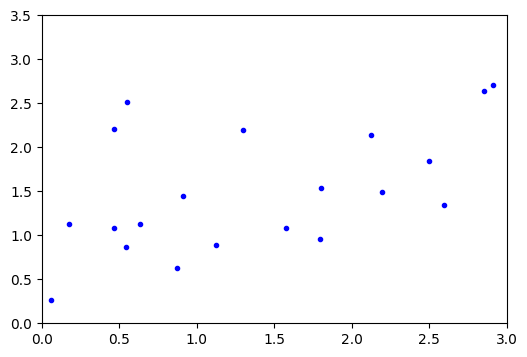

In [5]:
plt.figure(figsize=(6, 4))
plt.axis([0, 3, 0, 3.5])
plt.plot(X, y, "b.")
plt.show()

In [6]:
from modules.plot_model import plot_model
def plot_regressions(model, polynomial, alphas):
    plt.plot(X, y, "b.")
    plot_model(X, y, model, polynomial, alphas, random_state=42)

## Ridge Regression

#### with sklearn

In [7]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

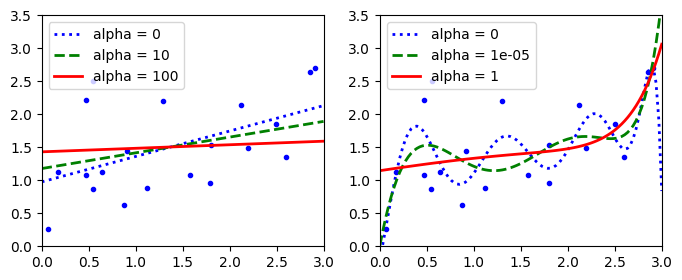

In [8]:
from modules.plot_model import plot_model
plt.figure(figsize=(8, 3))
plt.subplot(121)
plot_regressions(Ridge, polynomial=False, alphas=(0, 10, 100))
plt.subplot(122)
plot_regressions(Ridge, polynomial=True, alphas=(0, 1e-05, 1))

#### With SGDregressor

In [9]:
from sklearn.linear_model import SGDRegressor

sgd_red = SGDRegressor(penalty="l2", alpha=0.1/m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)

sgd_red.fit(X, y.ravel())
sgd_red.predict([[1.5]])

array([1.55302613])

## Lasso Regression

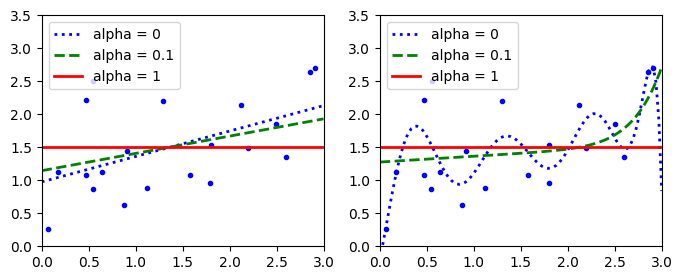

In [10]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8, 3))
plt.subplot(121)
plot_regressions(Lasso, False, (0, 0.1, 1))
plt.subplot(122)
plot_regressions(Lasso, True, (0, 0.1, 1))
plt.show()

## Elastic Net

In [11]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

ElasticNet(alpha=0.1)

In [12]:
elastic_net.predict([[1.5]])

array([1.54333232])

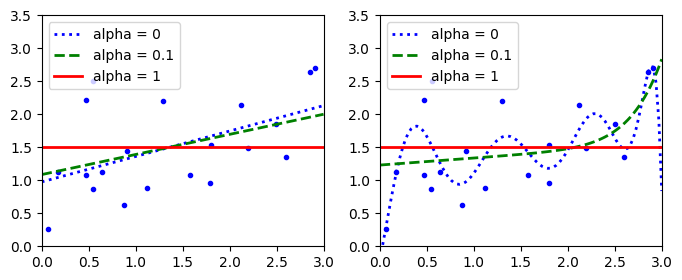

In [13]:
plt.figure(figsize=(8, 3))
plt.subplot(121)
plot_regressions(ElasticNet, polynomial=False, alphas=(0, 0.1, 1))
plt.subplot(122)
plot_regressions(ElasticNet, polynomial=True, alphas=(0, 0.1, 1))
plt.show()